## Problem statement

- HR Analytics




Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
- Attrition in HR




Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\First-Phase-Evaluation-Projects--1-\HR Analytics Project\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#### Columns

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- Age : Age of Employee 
- BusinessTravel : Frequency of business travel
- Department : Department of employee
- DistanceFromHome : Distance between workplace And Home
- Education : Education Level of Employee
- EducationField : Field of education of employee
- EmployeeCount : Count of Employee
- EmployeeNumber : Employee Id
- EnvironmentSatisfaction : Employee Satisfaction Rating
- Gender : Male/Female
- HourlyRate : Amount per Hour
- JobInvolvement : Employee Involvement Rating
- JobLevel : Employee Job Level
- JobRole : Employee job role
- JobSatisfaction : Employee job satisfaction
- MaritalStatus : Marital Status of Employee
- MonthlyIncome : Monthly Income of Employee
- NumCompaniesWorked : Number of companies Employee worked for
- Over18 : IS Employee Age Over 18
- OverTime : Noof Times Employee worked over time
- PercentSalaryHike : Salary Hike in Percentage
- PerformanceRating : Employee Performance Rating
- RelationshipSatisfaction : Employee Relationship Satisfaction
- StandardHours : Standerd Working Hours
- TotalWorkingYears : Total Number of employee Working Years
- TrainingTimesLastYear : Number of times Employee trained last year
- WorkLifeBalance: Employee Work Life balance Rating
- YearsAtCompany: No of Years Employee working in current company
- YearsInCurrentRole : No of Years Employee working in current Role
- YearsSinceLastPromotion : No of Years Employee working Since Last Promotion
- YearsWithCurrManager : No of Years Employee working With current Manager

#### Target
- Attrition : Yes or no Value

#### Analising basic metrics

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There are no Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

#### Findings
- All Numerric values are Integers 
- there are 21 Categorical columns
- StandardHours,Over18 and EmployeeCount contains only 1 value therefore they can be removed


In [8]:
# Removing unwanted columns
df.drop(columns=['StandardHours','Over18','EmployeeCount'],inplace=True)

# Removing duplicates if any
df.drop_duplicates(inplace=True)

In [9]:
# sorting columns
num_col = []
obj_col = []
for i in df.columns:
    if df[i].dtype == object:
        obj_col.append(i)
    else:
        num_col.append(i)

cat_col = []
n_cat_col = []
for i in df.columns:
    if df[i].nunique() <= 10:
        cat_col.append(i)
    else:
        n_cat_col.append(i)

In [10]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


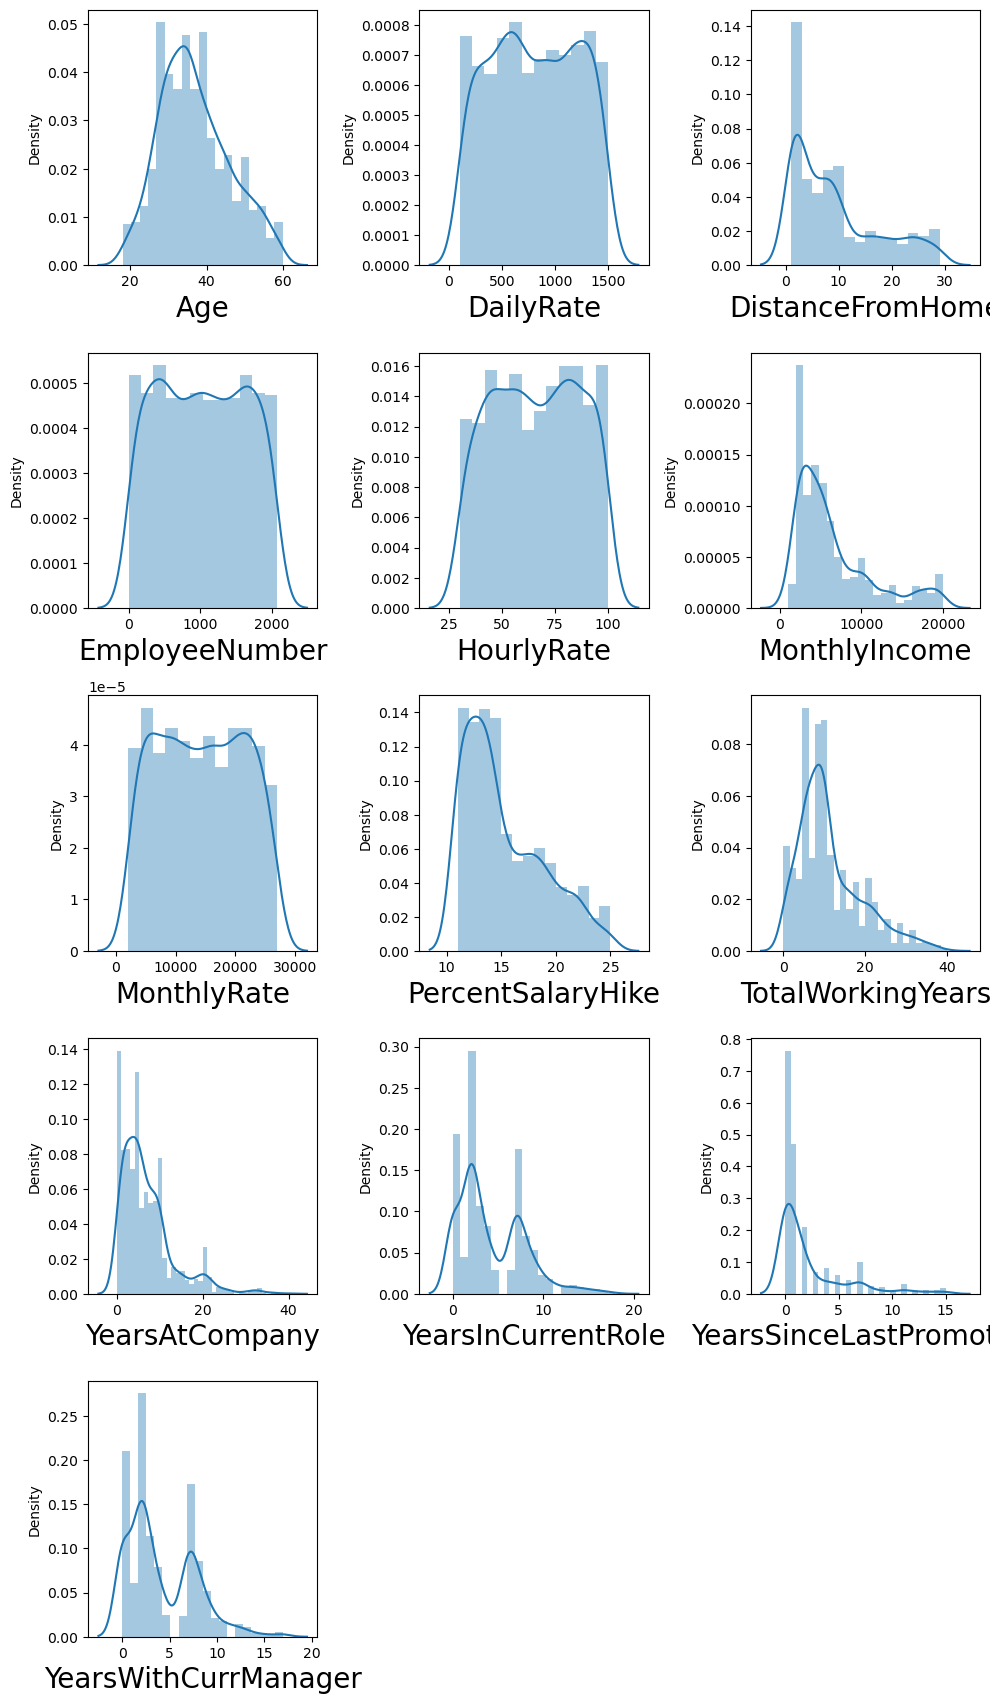

In [11]:
plt.figure(figsize=(10,20))
pn = 1
for column in n_cat_col:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()   

#### Observations from above results
- Distribution
    - Normally distributed (Since Mean ~= Median)
        - Age
        - EmployeeNumber
        - DailyRate
        - MonthlyRate
        - HourlyRate
    - Right skewed (mean > median)
        - DistanceFromHome
        - MonthlyIncome
        - PercentSalaryHike
        - TotalWorkingYears
        - YearsAtCompany
        - YearsInCurrentRole
        - YearsSinceLastPromotion
        - YearsWithCurrManager



Text(0.5, 1.0, 'Employee Attrition')

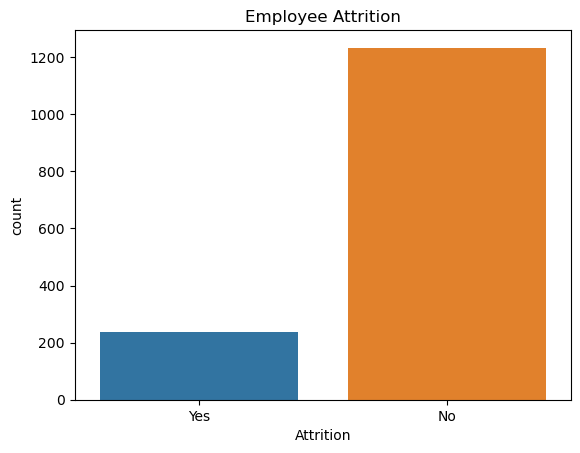

In [12]:
sns.countplot(data = df, x = 'Attrition')
plt.title('Employee Attrition')

We can observe that Most of the Employees are staying in the company rather than quitting

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

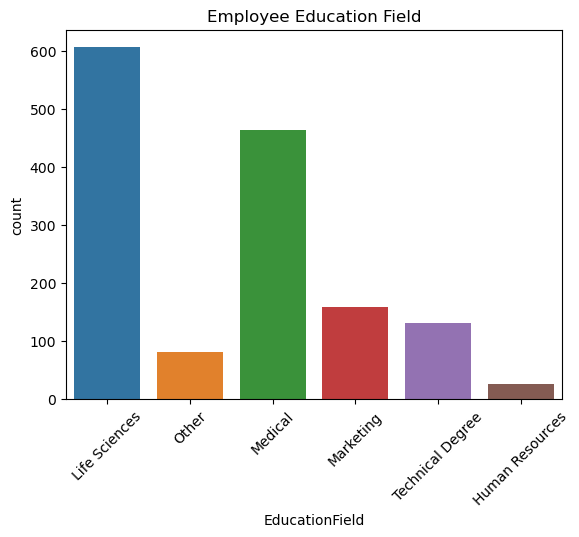

In [13]:
sns.countplot(data = df, x = 'EducationField')
plt.title('Employee Education Field')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Department')

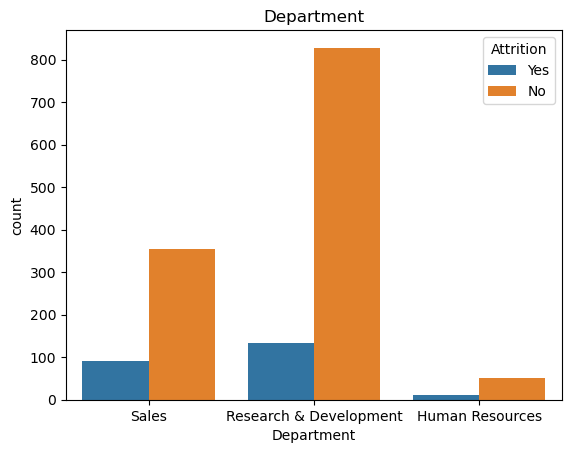

In [14]:
sns.countplot(data = df, x = 'Department',hue='Attrition')
plt.title('Department')

comparing Attrition of Departments we can observe that Sales Department has More number of people Who are Leaving

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

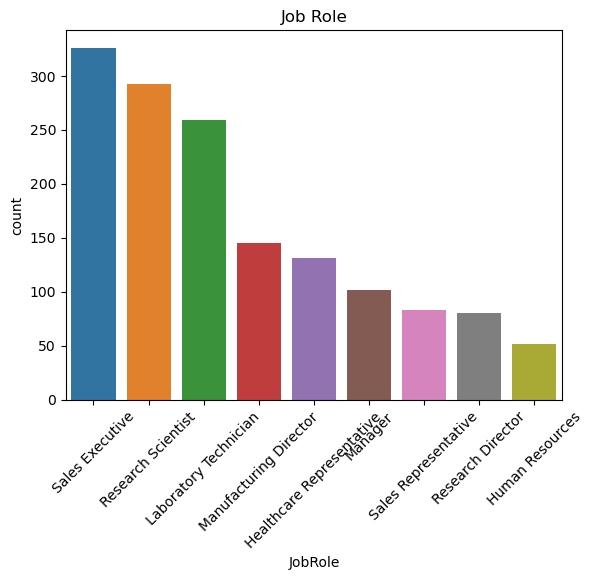

In [15]:
sns.countplot(data = df, x = 'JobRole')
plt.title('Job Role')
plt.xticks(rotation=45)

- Most of the Employees are working as Sales Executive 
- Among all job roles  Sales Representatives are leaving Most as compared to Employees staying in the Department

<AxesSubplot: xlabel='WorkLifeBalance', ylabel='count'>

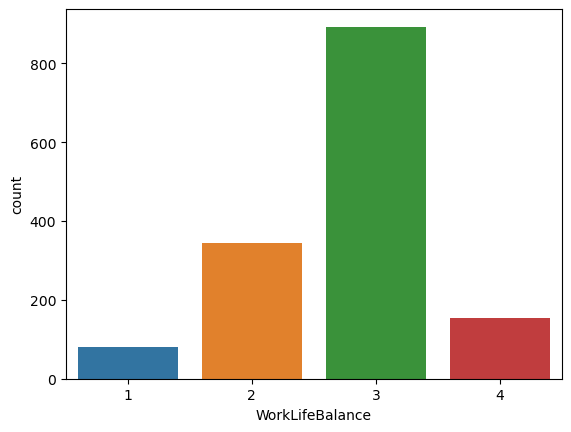

In [16]:
sns.countplot(data = df, x = 'WorkLifeBalance')

Most Employees are rating 3 as work life Balance

<AxesSubplot: xlabel='PerformanceRating', ylabel='count'>

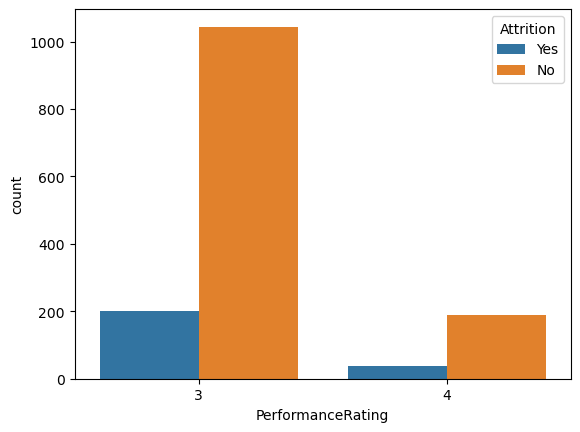

In [17]:
sns.countplot(data = df, x = 'PerformanceRating',hue='Attrition')

We can Observe that Most people reated 3 for Their Performence

### Encoading Categorical Data

- There are many Object type columns
- some of them contains 5-10 categories



Due to following reasons we cannot use one hot encocoader Because it will create many columns , but we already have many columns so we must use Label Encoader

In [18]:
from sklearn.preprocessing import LabelEncoder
Labenc = LabelEncoder()

for i in obj_col:
    df[i]=Labenc.fit_transform(df[i])

df    


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


### Outliers

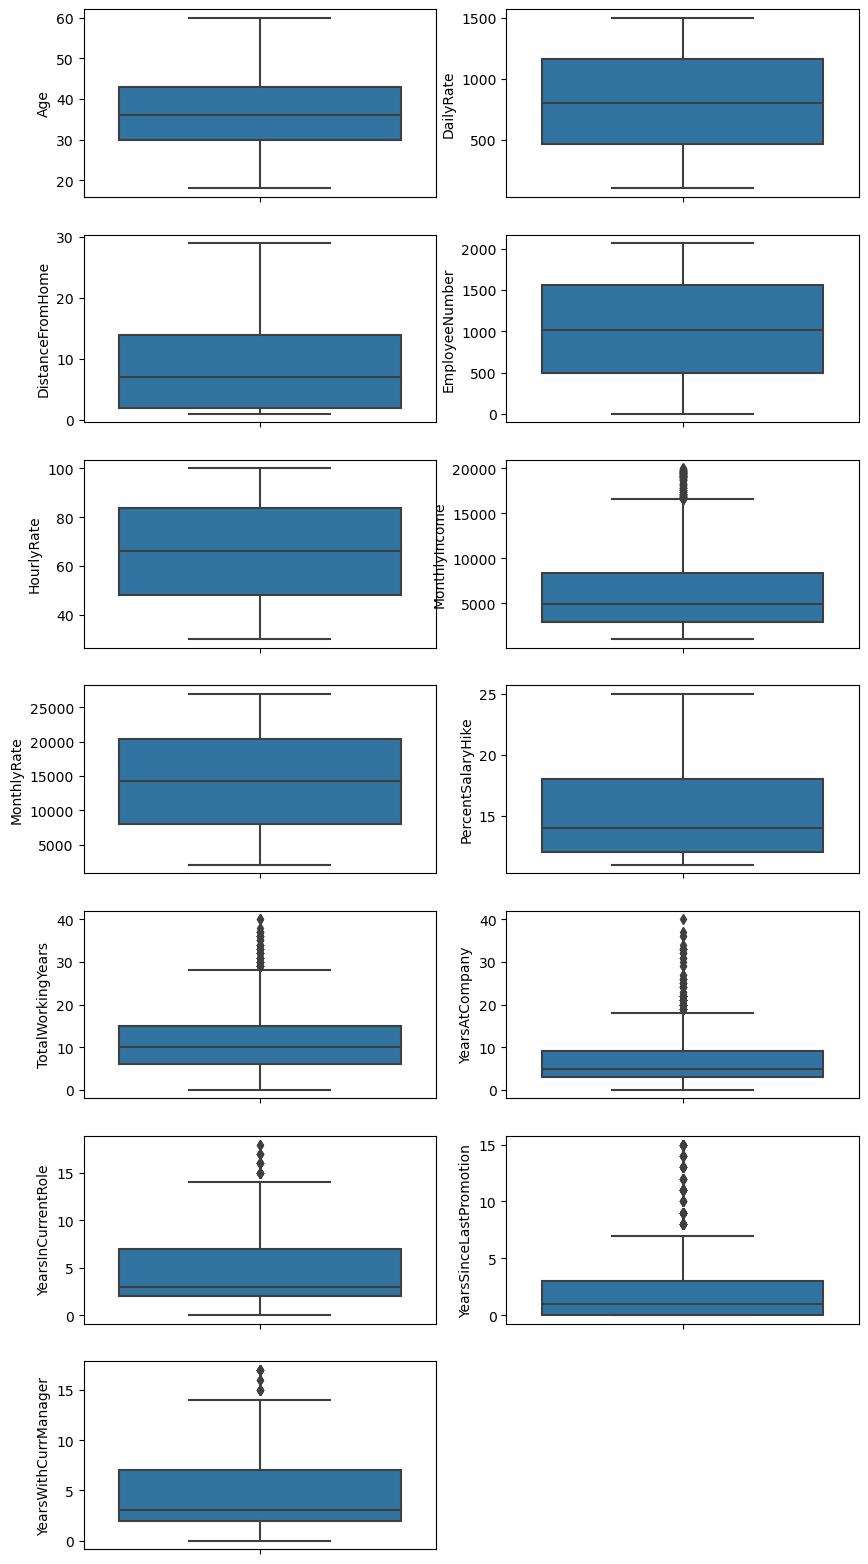

In [19]:
plt.figure(figsize=(10,20))
pn = 1
for i in n_cat_col:
    sns.boxplot(y=df[i],ax=plt.subplot(7,2,pn))
    pn+=1

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers
- Since there are many outliers we shall use 3.5 as z score Threshold

In [20]:
prev = df.shape

In [21]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df[num_col]))
z[z>3].count()

Age                          0
DailyRate                    0
DistanceFromHome             0
Education                    0
EmployeeNumber               0
EnvironmentSatisfaction      0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobSatisfaction              0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears           16
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              25
YearsInCurrentRole          13
YearsSinceLastPromotion     42
YearsWithCurrManager        14
dtype: int64

In [22]:
df[num_col] = df[num_col][z<3]
df = df.dropna()
df.reset_index(drop=True,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8.0,0,1,6.0,4.0,0.0,5.0
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10.0,3,3,10.0,7.0,1.0,7.0
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7.0,3,3,0.0,0.0,0.0,0.0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8.0,3,3,8.0,7.0,3.0,0.0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6.0,3,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,0,1,884,1,23,2,3,2061,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17.0,3,3,5.0,2.0,0.0,3.0
1383,39,0,2,613,1,6,1,3,2062,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9.0,5,3,7.0,7.0,1.0,7.0
1384,27,0,2,155,1,4,3,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6.0,0,3,6.0,2.0,0.0,3.0
1385,49,0,1,1023,2,2,3,3,2065,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17.0,3,2,9.0,6.0,0.0,8.0


In [23]:
df.shape

(1387, 32)

In [24]:
print('Data Loss % = ',np.round((prev[0]-df.shape[0])*100/prev[0],2),"%")

Data Loss % =  5.65 %


Since our data loss is only 5.6% we can continue

### Skeweness

In [25]:
df[n_cat_col].skew().abs()

Age                        0.472280
DailyRate                  0.017078
DistanceFromHome           0.954752
EmployeeNumber             0.018931
HourlyRate                 0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

In [26]:
# seperating skew columns
skew=[num_col[i] for i in np.where(df[num_col].skew().abs() > 0.5)[0].tolist()]

In [27]:
skew

['DistanceFromHome',
 'JobInvolvement',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Removing Skeweness in These columns

In [28]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df[skew] = pt.fit_transform(df[skew])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,0.698793,2,1,1,2,0,94,6.136924,0.710565,7,4,2,3.860102,19479,2.017929,1,0.711293,0.018228,1,-0.000000,3.331995,0.000000,1.419993,2.427596,2.018485,-0.000000,2.260281
1,49,0,1,279,1,2.254628,1,1,2,3,1,61,3.439577,0.710565,6,2,1,3.837020,24907,0.674600,0,0.726680,0.018228,4,0.602674,3.786692,2.180336,6.610730,3.155981,2.794574,0.566648,2.727090
2,37,1,2,1373,1,1.112840,2,4,4,4,1,92,3.439577,0.522057,2,3,2,3.687033,2396,1.804380,1,0.719452,0.018228,2,-0.000000,3.079851,2.180336,6.610730,0.000000,0.000000,-0.000000,0.000000
3,33,0,1,1392,1,1.409000,4,1,5,4,0,56,6.136924,0.522057,6,3,1,3.745749,23159,0.674600,1,0.711293,0.018228,3,-0.000000,3.331995,2.180336,6.610730,2.823661,2.794574,0.939888,0.000000
4,27,0,2,591,1,1.112840,1,3,7,1,1,40,6.136924,0.522057,2,2,1,3.775261,16632,2.106209,0,0.713892,0.018228,4,0.602674,2.806491,2.180336,6.610730,1.242409,1.280069,0.803607,1.264277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,36,0,1,884,1,3.299077,2,3,2061,3,1,41,9.429467,0.710565,2,4,1,3.724315,12290,1.511783,0,0.721975,0.018228,3,0.602674,5.050438,2.180336,6.610730,2.195252,1.280069,-0.000000,1.656822
1383,39,0,2,613,1,1.990845,1,3,2062,4,1,42,3.439577,0.809574,0,1,1,3.930618,21457,1.511783,0,0.719452,0.018228,1,0.602674,3.566679,3.252793,6.610730,2.635316,2.794574,0.566648,2.727090
1384,27,0,2,155,1,1.640095,3,1,2064,2,1,87,9.429467,0.710565,4,2,1,3.863676,5174,0.674600,1,0.724723,0.018228,2,0.602674,2.806491,0.000000,6.610730,2.427596,1.280069,-0.000000,1.656822
1385,49,0,1,1023,2,1.112840,3,3,2065,4,1,63,3.439577,0.710565,7,2,1,3.844446,13243,1.052508,0,0.717888,0.018228,4,-0.000000,5.050438,2.180336,3.637683,2.996317,2.563919,-0.000000,2.928111


#### Corelation Analysis

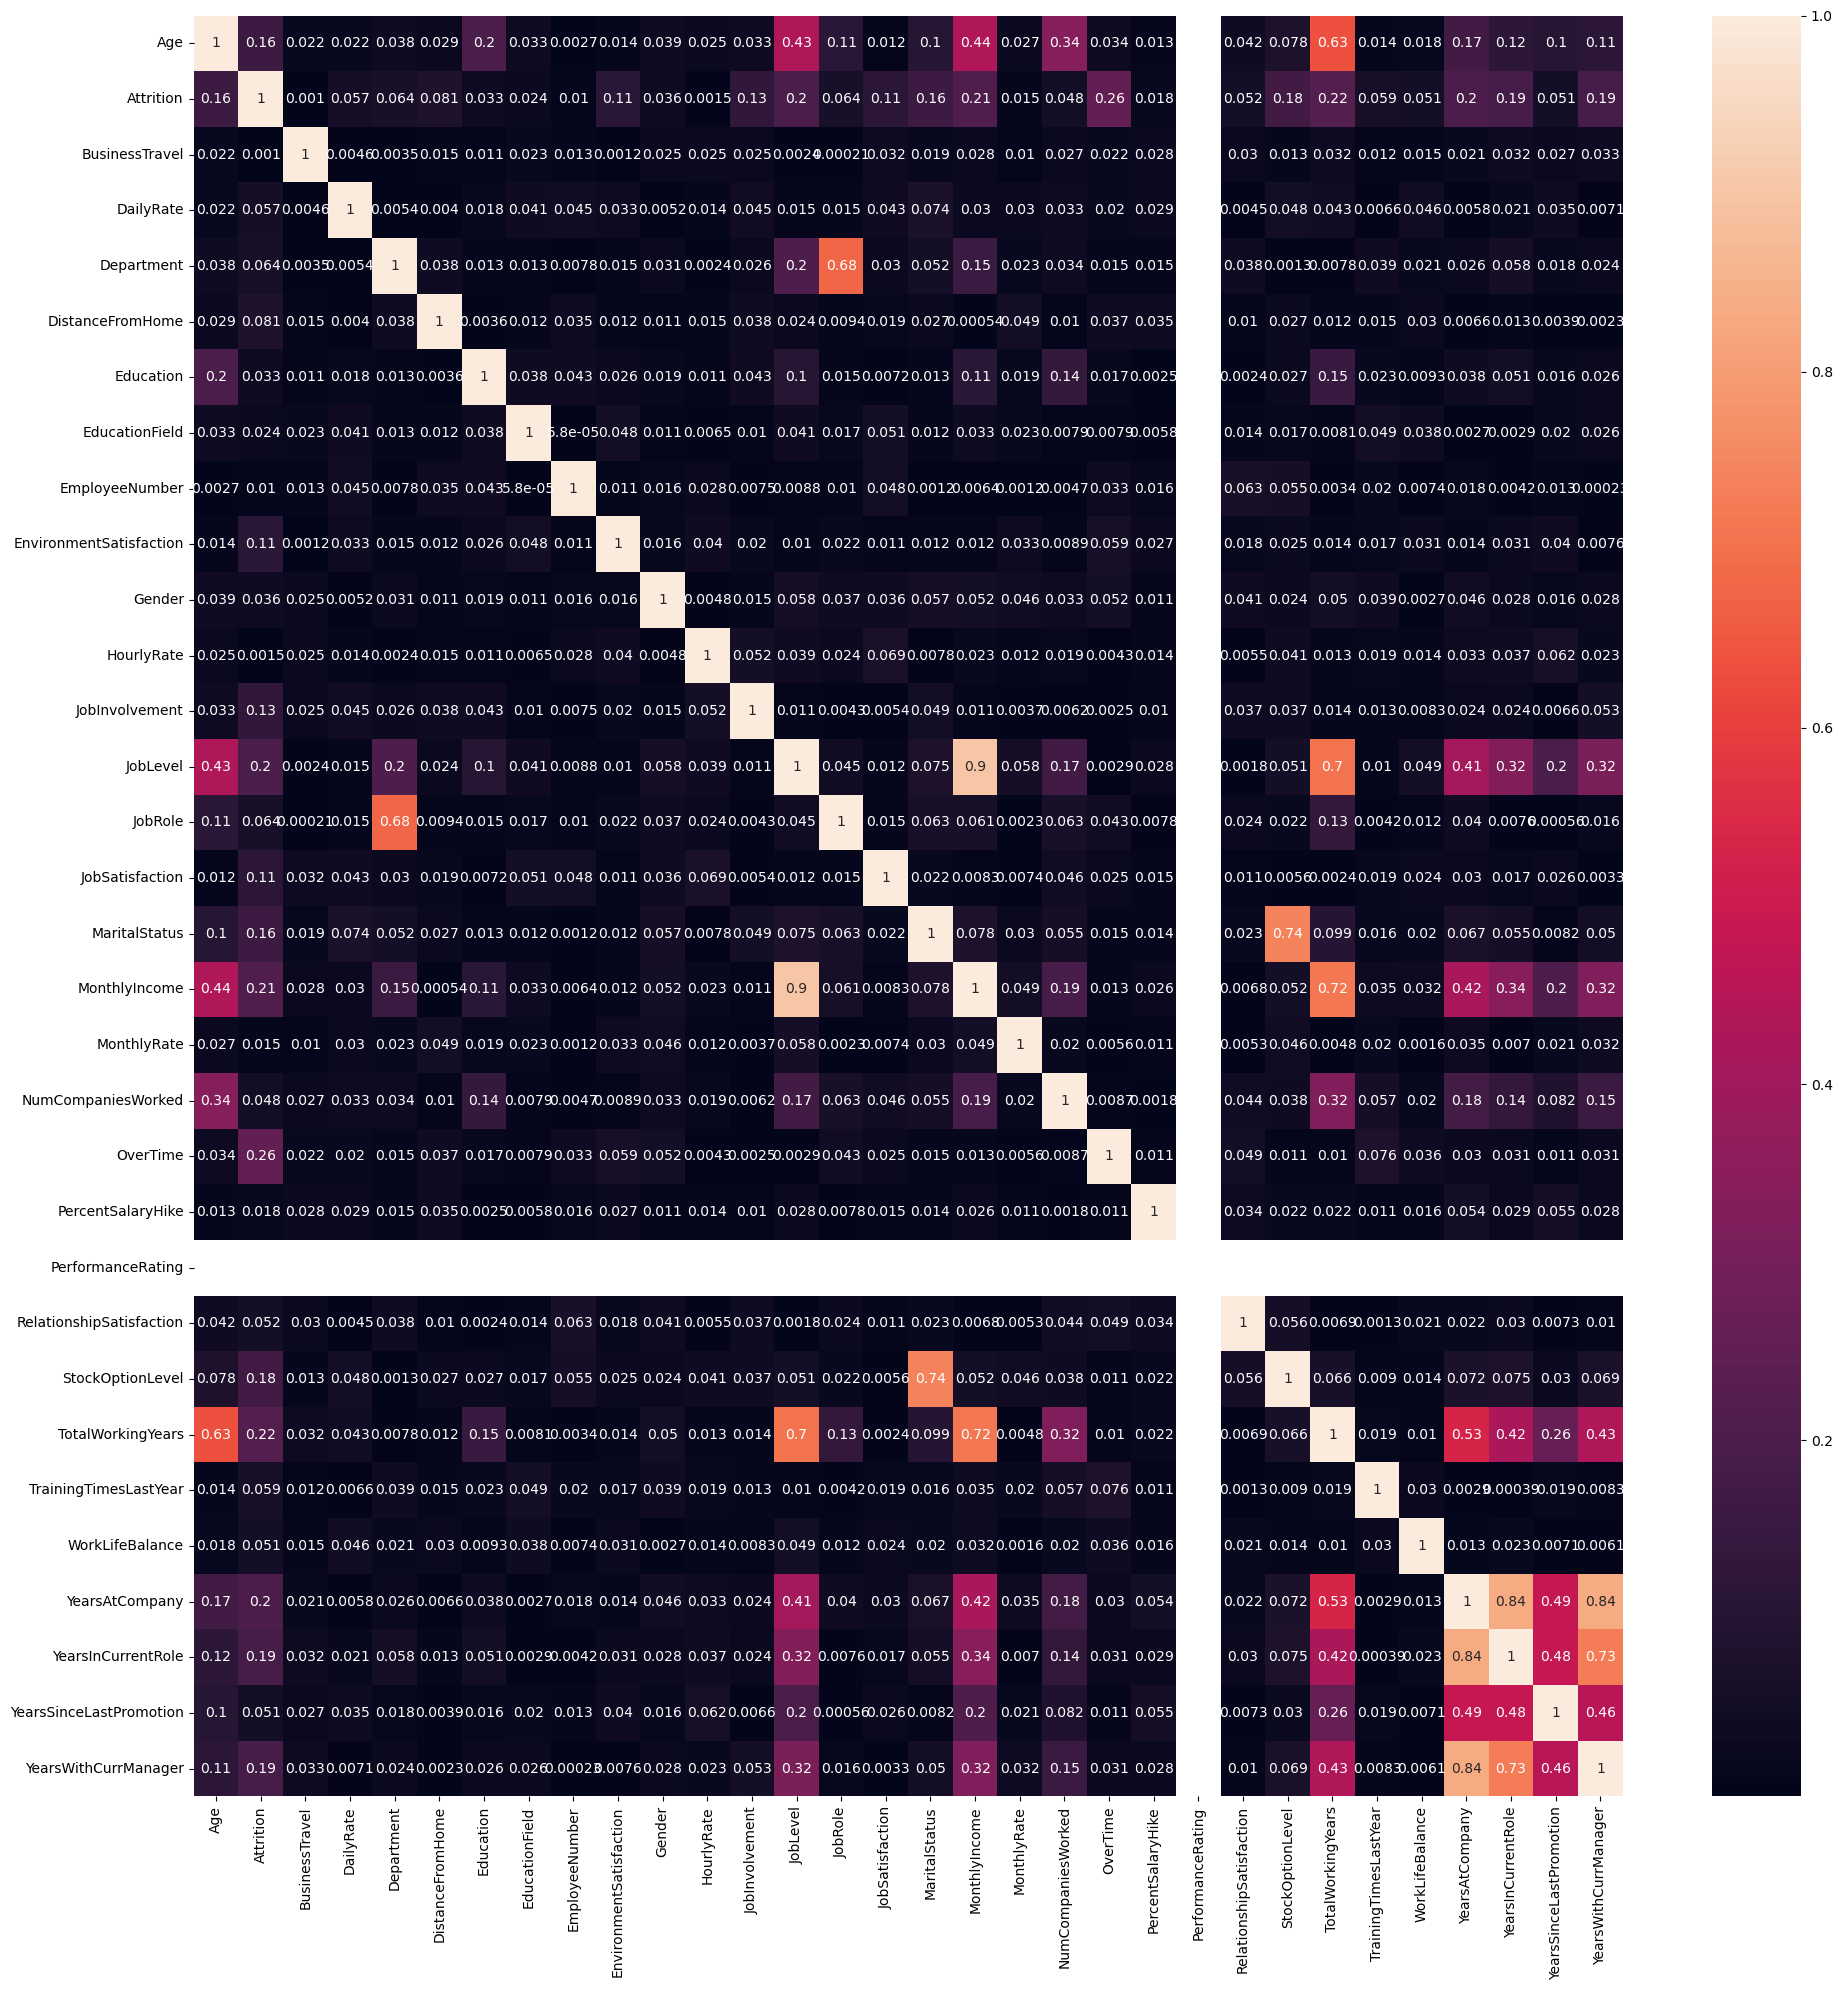

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- There is High Multicolinearity in all 'Years' columns and multicolinearity between Job level and Monthly income


In [30]:
x=df.drop('Attrition',axis=1)
y = df.Attrition
y

0       1
1       0
2       1
3       0
4       0
       ..
1382    0
1383    0
1384    0
1385    0
1386    0
Name: Attrition, Length: 1387, dtype: int32

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_sc)

array([[-4.14471058e-01,  5.81388528e-01, -2.46665793e+00, ...,
         1.76683241e-01,  6.85419306e-02, -4.57327698e-17],
       [-1.48446701e+00, -7.58580857e-01,  2.68700990e-01, ...,
         1.38665687e-01,  1.20787918e-01,  8.31071250e-17],
       [ 3.52717239e+00,  1.66845715e+00, -3.72881463e-01, ...,
        -3.97916947e-01,  2.91599972e-01, -1.96568463e-16],
       ...,
       [ 5.45587372e-01,  1.55977850e-01,  9.10954653e-01, ...,
         3.72957068e-01,  6.09017384e-03,  2.30473320e-17],
       [-1.66972264e+00, -1.05247111e-01, -1.23663003e+00, ...,
        -2.60249905e-01,  3.77073420e-02, -1.99924924e-17],
       [ 3.82338527e-01, -6.82800723e-03,  3.95926233e-01, ...,
         3.00165228e-02,  3.47951679e-01,  3.24070711e-17]])

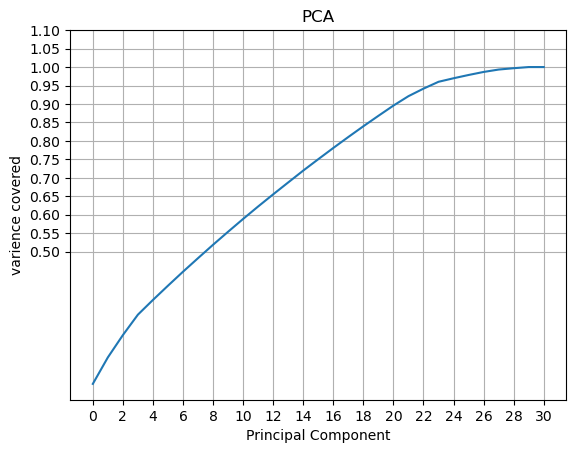

In [33]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.yticks(np.arange(0.5,1.1,0.05))
plt.xticks(range(0,31,2))
plt.xlabel('Principal Component')
plt.ylabel('varience covered')
plt.title('PCA')
plt.show()

We can observe that almost all features are contributing for model Therefore we must keep all columns

In [34]:
x_sc = sc.fit_transform(x)
x_sc

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

### Train test Split

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [36]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [37]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
179,996.0,88.942308,89.048991
157,902.0,88.846154,88.760807
116,640.0,88.750000,88.760807
95,534.0,88.653846,88.760807
174,980.0,88.557692,89.048991
...,...,...,...
51,260.0,87.500000,87.608069
171,972.0,87.500000,88.184438
133,743.0,87.500000,87.896254
7,49.0,87.500000,87.896254


- we can observe that Random state 996 we get max accuracy wit minimum difference

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.25,random_state=996)

### Training the model

Logistic regression 

In [39]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.8904899135446686


In [40]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_sc,y,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  4 
Cross Validation score =  87.31113924472356 
Accuracy score 89.04899135446685


cv = 

 5 
Cross Validation score =  87.52694595226347 
Accuracy score 89.04899135446685


cv =  6 
Cross Validation score =  87.52643429367566 
Accuracy score 89.04899135446685


cv =  7 
Cross Validation score =  87.52601390792346 
Accuracy score 89.04899135446685


cv =  8 
Cross Validation score =  87.81517839346222 
Accuracy score 89.04899135446685


cv =  9 
Cross Validation score =  87.45286971093422 
Accuracy score 89.04899135446685



- cv = 8 is giving best result

In [41]:
cv = 8

In [42]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [43]:
lr_s_cv_score=cross_val_score(lr,x_sc,y,cv=cv)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score_mean*100,2),'Test accuracy':round(lr_ac_score,2),'Difference':round(np.abs(lr_ac_score-(lr_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  87.81517839346222 
Accuracy score =  89.04899135446685 
Difference =  1.233812961004631


##### Random  forest classifer

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

85.5907780979827


In [45]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x_sc,y,cv=cv)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score,2),'Difference':round(np.abs(rfc_ac_score-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  85.50926848714371 
Accuracy score =  85.5907780979827 
Difference =  -0.08150961083899233


##### AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

86.74351585014409


In [47]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x_sc,y,cv=cv)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)
ms_df = ms_df.append({'Model':'Adaboost classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score,2),'Difference':round(np.abs(abc_ac_score-(abc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  86.80735499302372 
Accuracy score =  86.74351585014409 
Difference =  0.06383914287962966


##### GradientBoostingClassifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_test_pred=gbc.predict(x_test)
gbc_ac_score = accuracy_score(y_test,gbc_test_pred)*100
print (gbc_ac_score)

86.45533141210375


In [49]:
# cross validation
gbc_s_cv_score=cross_val_score(gbc,x_sc,y,cv=cv)
gbc_s_cv_score_mean = gbc_s_cv_score.mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score,'\nDifference = ',(gbc_s_cv_score_mean*100)-gbc_ac_score)
ms_df = ms_df.append({'Model':'Gradient boosting classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score,2),'Difference':round(np.abs(gbc_ac_score-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  86.30240515580361 
Accuracy score =  86.45533141210375 
Difference =  -0.1529262563001339


##### XGBClassifier

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)

86.1671469740634


In [51]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x_sc,y,cv=cv)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)
ms_df = ms_df.append({'Model':'XGBOOST classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score,2),'Difference':round(np.abs(xgb_ac_score-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  86.15706597568268 
Accuracy score =  86.1671469740634 
Difference =  -0.0100809983807153


##### SVC

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_test_pred=svc.predict(x_test)
svc_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (svc_ac_score)

86.45533141210375


In [53]:
# cross validation
svc_s_cv_score=cross_val_score(svc,x_sc,y,cv=cv)
svc_s_cv_score_mean = svc_s_cv_score.mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score,'\nDifference = ',(svc_s_cv_score_mean*100)-svc_ac_score)
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score,2),'Difference':round(np.abs(svc_ac_score-(svc_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  86.37258321706199 
Accuracy score =  86.45533141210375 
Difference =  -0.08274819504175923


##### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_test_pred=svc.predict(x_test)
knn_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (knn_ac_score)

86.45533141210375


In [55]:
# cross validation
knn_s_cv_score=cross_val_score(knn,x_sc,y,cv=cv)
knn_s_cv_score_mean = knn_s_cv_score.mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score,'\nDifference = ',(knn_s_cv_score_mean*100)-knn_ac_score)
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score,2),'Difference':round(np.abs(knn_ac_score-(knn_s_cv_score_mean*100)),2)},ignore_index=True)


Cross Validation score =  84.71530130888313 
Accuracy score =  86.45533141210375 
Difference =  -1.7400301032206187


In [56]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
0,Logistic regression,87.82,89.05,1.23
2,Adaboost classifier,86.81,86.74,0.06
3,Gradient boosting classifier,86.30,86.46,0.15
5,SVC,86.37,86.46,0.08
6,KNN Classifier,84.72,86.46,1.74
4,XGBOOST classifier,86.16,86.17,0.01
1,Random forest classifier,85.51,85.59,0.08


- we can observe that Logistic regression is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [57]:
LogisticRegression.__getattribute__

<slot wrapper '__getattribute__' of 'object' objects>

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [59]:
# using grid search cv
gcv = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=cv)
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.875


# Training with best parms

In [60]:
final_model = LogisticRegression(penalty='l2',C=0.1)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

89.33717579250721


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94       292
           1       0.78      0.45      0.57        55

    accuracy                           0.89       347
   macro avg       0.84      0.72      0.76       347
weighted avg       0.89      0.89      0.88       347



#### roc curve

In [62]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [63]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.        0.0239726 1.       ] 
tpr =  [0.         0.45454545 1.        ] 
threshold =  [2 1 0]


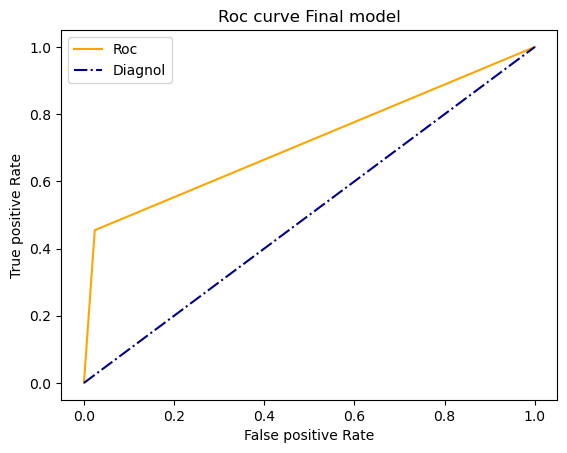

In [64]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [65]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

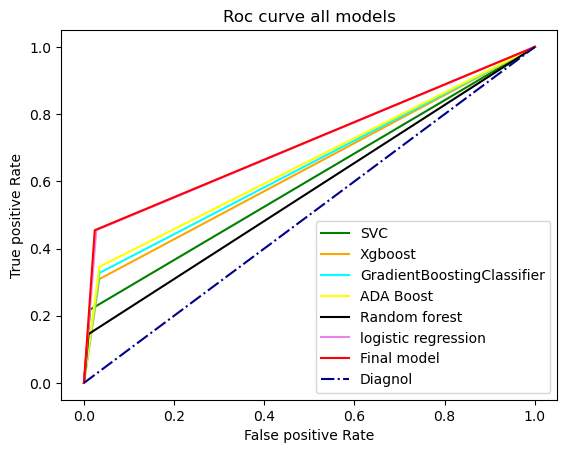

In [66]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc_test_pred)
fpr3,tpr3,threshold = roc_curve(y_test,xgb_test_pred)
fpr4,tpr4,threshold = roc_curve(y_test,gbc_test_pred)
fpr5,tpr5,threshold = roc_curve(y_test,abc_test_pred)
fpr6,tpr6,threshold = roc_curve(y_test,rfc_test_pred)
fpr7,tpr7,threshold = roc_curve(y_test,lr_test_pred)



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='violet',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [67]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [68]:
final_model.coef_[0]

array([-0.14406511, -0.05773464, -0.09085958,  0.47346004,  0.29846063,
        0.1096251 ,  0.11083201, -0.06264007, -0.44377311,  0.22138588,
        0.04269953, -0.31521859, -0.10265653, -0.2340428 , -0.3768478 ,
        0.20992135, -0.36428827,  0.06276011,  0.41268713,  0.74485823,
       -0.05794971,  0.        , -0.25950734, -0.33329017, -0.44822088,
       -0.25032971, -0.21089735,  0.16772546, -0.24027396,  0.24086245,
       -0.24478245])

In [69]:
f_imp = pd.DataFrame({"Feature Name":x.columns,'Feature Importance':final_model.coef_[0],'Absolute Feature Importance':np.abs(final_model.coef_[0])})

In [70]:
f_imp.sort_values('Absolute Feature Importance',ignore_index=True,ascending=False)

,Feature Name,Feature Importance,Absolute Feature Importance
0,OverTime,0.744858,0.744858
1,Department,0.473460,0.473460
2,TotalWorkingYears,-0.448221,0.448221
3,EnvironmentSatisfaction,-0.443773,0.443773
4,NumCompaniesWorked,0.412687,0.412687
5,JobSatisfaction,-0.376848,0.376848
6,MonthlyIncome,-0.364288,0.364288
7,StockOptionLevel,-0.333290,0.333290
8,JobInvolvement,-0.315219,0.315219
9,DistanceFromHome,0.298461,0.298461


### Conclusion

- From Accuracy score and Roc Graph We can say that Our final model is the best model for this problem

- Important features determining Attrition are:
    - OverTime
    - Department
    - Total Working years

- Least Important Features determining Attrition are:
    - BusinessTravel
    - HourlyRate
    - PerformanceRating	